# Improving Plot Aesthetics

The <a href='http://nces.ed.gov/programs/digest/2013menu_tables.asp'>Department of Education Statistics</a> releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled <a href='http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv'>here</a>. Here's a preview of the first few rows:

In [2]:
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot.

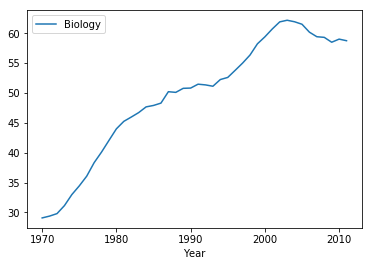

In [3]:
# generate a line chart that visualizes the historical percentage of biology degrees awarded to women
women_degrees.plot(x='Year', y='Biology')
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987.

If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`.

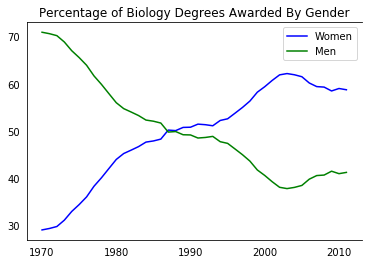

In [4]:
# create figure
fig, ax = plt.subplots()

# visualizes the percentages of Biology degrees awarded to women over time.
ax.plot(women_degrees.Year, women_degrees.Biology, c='blue', label='Women')

# visualizes the percentages of Biology degrees awarded to men over time
ax.plot(women_degrees.Year, 100-women_degrees.Biology, c='green', label='Men')

# Remove all tick marks
ax.tick_params(bottom=False, top=False, left=False, right=False)

# Hide right the spines
ax.spines["right"].set_visible(False)

# Set title
ax.set_title("Percentage of Biology Degrees Awarded By Gender")

# Generate legend
ax.legend(loc='upper right')

plt.show()

In [5]:
# visualizes the percentages of Biology degrees awarded to men over time
ax.plot(women_degrees.Year, 100-women_degrees.Biology, c='green', label='Men')
plt.show()

To customize the appearance of the ticks, we use the `Axes.tick_params()` method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

- `bottom: False`
- `top: False`
- `left: False`
- `right: False`

In [6]:
# Remove all tick marks
ax.tick_params(bottom=False, top=False, left=False, right=False)

When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. 

By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the `matplotlib.spines.Spine` class. When we create an Axes instance, four Spine objects are created for us. 

To hide all of the spines, we need to:

- access each Spine object in the dictionary
- call the Spine.set_visible() method
- pass in the Boolean value False

The following line of code **removes the spines for the right axis**:
> `ax.spines["right"].set_visible(False)`

A good chart uses a consistent style for the elements that aren't directly conveying the data points. These elements are part of the non-data ink in the chart. By keeping the non-data ink as consistent as possible across multiple plots, differences in those elements stick out easily to the viewer. This is because our visual processing systems are excellent at discerning differences quickly and brings them to the front of our thought process. The similarities naturally fade to the back of our thought process.

Let's generate line charts for four STEM degree categories on a grid to encourage comparison. Our instructions for generating the chart are cumbersome. Here's what the final chart looks like, so you can refer to it as you write your code:

![](https://s3.amazonaws.com/dq-content/four_major_categories_plots.png)

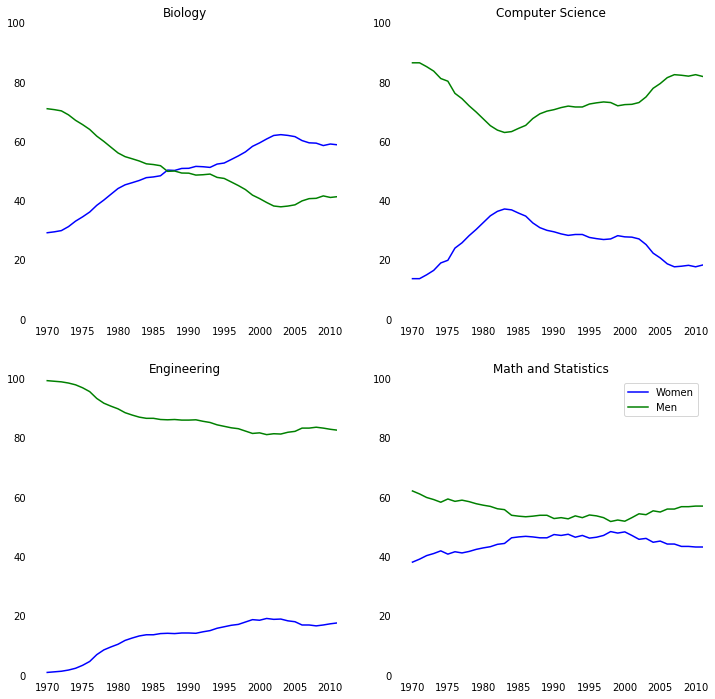

In [7]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

# Generate a line chart using the women and men percentages for major cats
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    
    # Set the x-axis limit to range from 1968 to 2011
    ax.set_xlim(1968,2011)
    
    # Set the y-axis limit to range from 0 to 100
    ax.set_ylim(0,100)
    
    # Set the title of each subplot to the name of the major category
    ax.set_title(major_cats[sp])
    
    # Hide all of the spines and tick marks.
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts. 

![](https://s3.amazonaws.com/dq-content/tableau_rgb_values.png)

To specify a line color (dark blue) using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).

- **Red**: 0
- **Green**: 107
- **Blue**: 164

> `cb_dark_blue = (0/255,107/255,164/255)` <br/>
`ax.plot(women_degrees['Year'], 
         women_degrees['Biology'], 
         label='Women', c=cb_dark_blue)`

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. 

**To emphasize the lines in the plots**, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the `Axes.plot()` method, we can use the `linewidth` parameter to specify the line width. Matplotlib expects a float value for this parameter:

> `ax.plot(women_degrees['Year'], 
            women_degrees['Biology'], 
            label='Women', 
            c=cb_dark_blue, linewidth=2)`

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


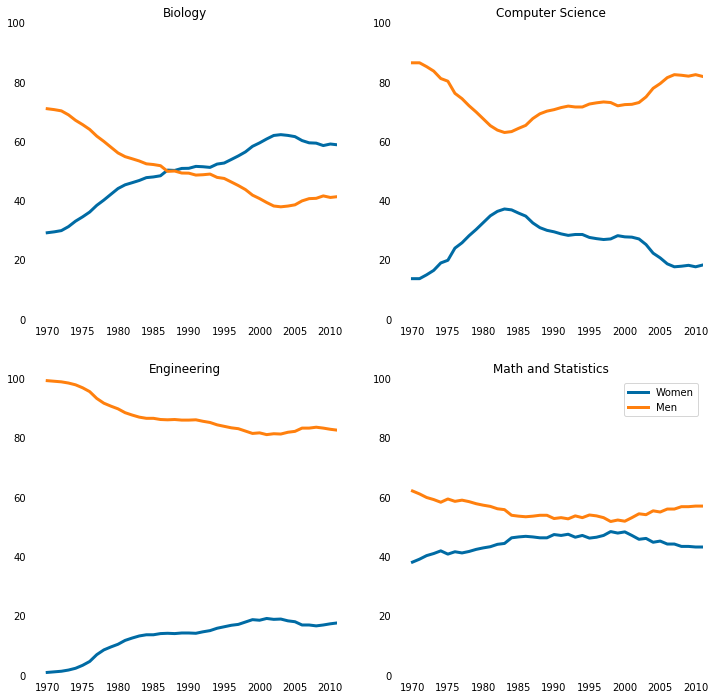

In [8]:
fig = plt.figure(figsize=(12, 12))

cb_dark_blue = (0/255, 107/255, 164/255) # women
cb_orange = (255/255, 128/255, 14/255) # men
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

To make the viewing experience more coherent, we can:
- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

Here's what that would look like:

![](https://s3.amazonaws.com/dq-content/line_charts_dec_initial_gg.png)

The leftmost plot has the **largest gender gap in 1968** while the rightmost plot has the **smallest gender gap in 1968**. If we're instead interested in the recent gender gaps in STEM degrees, we can order the plots from largest to smallest ending gender gaps. Here's what that would look like:

![](https://s3.amazonaws.com/dq-content/line_charts_dec_ending_gg.png)

**Order the charts by decreasing ending gender gap**. We've populated the list `stem_cats` with the six STEM degree categories.


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


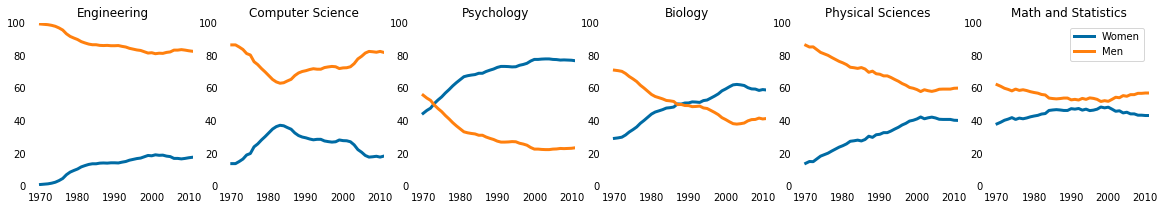

In [9]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Change the width of the figure to a width of 20 inches and a height of 3 inches
fig = plt.figure(figsize=(20, 3))


for sp in range(0,len(stem_cats)):
    # Change the subplot layout to 1 row by 6 columns.
    ax = fig.add_subplot(1,6,sp+1)
    
    # plot line chart
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # hide all spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    
    # customise plot
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders:

![](https://s3.amazonaws.com/dq-content/annotated_legend.png)

If you notice, even the position of the text annotations have meaning. In both plots, the annotation for **Men** is positioned above the orange line while the annotation for **Women** is positioned below the dark blue line. 

This positioning subtly suggests that men are a majority for the degree categories the line charts are representing (Engineering and Math and Statistics) and women are a minority for those degree categories.

To add text annotations to a matplotlib plot, we use the `Axes.text()` method. This method has a few required parameters:

- **x**: x-axis coordinate (as a float)
- **y**: y-axis coordinate (as a float)
- **s**: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. 

If we want to add text at the intersection of `1970` from the x-axis and `0` from the y-axis, we would pass in those values:
> `ax.text(1970, 0, "starting point")`

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


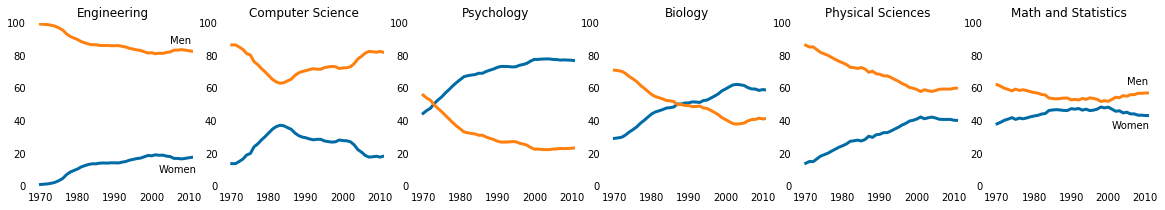

In [10]:
fig = plt.figure(figsize=(20, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
        
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()